In [25]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from power.ml_ops.data import get_pv_data, clean_pv_data
from power.ml_ops.model import model_yesterday

In [4]:
# data = get_pv_data()
# pv = clean_pv_data(data)
# pv

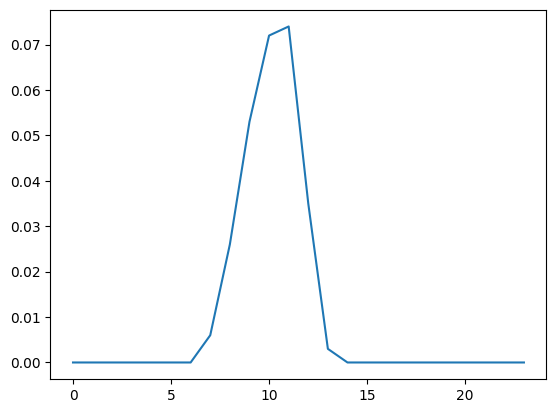

In [49]:
url = 'our-api-url_local'
params= {'requests':'params'}
base_url = "http://127.0.0.1:8000"
endpoint = "/predict/previous_value"
url_= f"{base_url}{endpoint}"

input_prediction_date = "2019-01-01 01:00:00"

params ={
    'input_date':input_prediction_date
    }



response = requests.get(url_, params=params).json()
baseline_data = response.get(input_prediction_date)
plt.plot(baseline_data);

In [9]:
input_timestamp = pd.Timestamp(input_prediction_date, tz='UTC')
idx = pv[pv.utc_time == input_timestamp].index[0]


341881

In [50]:
response

{'2019-01-01 01:00:00': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.006,
  0.026,
  0.053,
  0.072,
  0.074,
  0.035,
  0.003,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [60]:
baseline_df = pd.DataFrame(response)
baseline_df.get(input_prediction_date)

0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.006
8     0.026
9     0.053
10    0.072
11    0.074
12    0.035
13    0.003
14    0.000
15    0.000
16    0.000
17    0.000
18    0.000
19    0.000
20    0.000
21    0.000
22    0.000
23    0.000
Name: 2019-01-01 01:00:00, dtype: float64

In [46]:
pd.DataFrame([
    [4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]
    ],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


(0.0, 265.0)

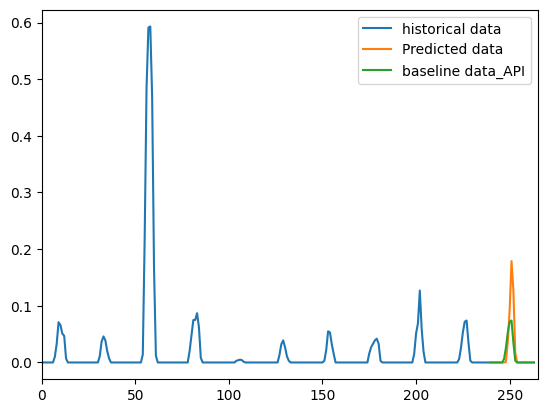

In [64]:
days_to_display = 10

# Graph for PV data
hours_to_display = 24 * days_to_display

X = pv.iloc[idx-hours_to_display:idx,:].set_index(np.arange(hours_to_display))
y = pv.iloc[idx:idx+24,:].set_index(np.arange(hours_to_display,hours_to_display+24))
y_pred = pv.iloc[idx-24:idx,:].set_index(np.arange(hours_to_display,hours_to_display+24))
y_req = baseline_df.set_index(np.arange(hours_to_display,hours_to_display+24))

fig, ax = plt.subplots()
ax.plot(X.electricity, label='historical data')
ax.plot(y.electricity, label='Predicted data')
ax.plot(y_req.get(input_prediction_date), label='baseline data_API')
ax.legend()
plt.xlim(0,265)
# st.pyplot(fig)

In [56]:
y_req

,2019-01-01 01:00:00
240,0.000
241,0.000
242,0.000
243,0.000
244,0.000
245,0.000
246,0.000
247,0.006
248,0.026
249,0.053
